In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so plot will not be displayed
# if the alternation period is correct, apply data
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so plot will not be displayed
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
# frb.alex_jointplot(frbdata_sel) # commented so plot will not be displayed

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction

In [2]:
bdata = bhm.BurstData(frbdata_sel)

In [3]:
try:
    bdata.models[0]
except Exception as e:
    print(e)
else:
    print('bdata has models')

No optimizations run, must run calc_models or optimize for H2MM_result objects to exist


In [4]:
# calculate models
bdata.models.calc_models()

bdata.models[0]

The model converged after 1 iterations

The model converged after 36 iterations

The model converged after 121 iterations

The model converged after 404 iterations

,E_raw,S_raw,to_state_0
state_0,0.161329,0.687172,20000000.000000


In [5]:
bdata.models.BIC

array([323390.78889963, 274041.04580956, 266584.73431315, 265800.67189548])

In [6]:
bdata.models[0].bic

323390.7888996289

In [7]:
bdata.models.ICL

array([323390.78889956, 275340.11281888, 269885.74586401, 271100.67269904])

In [8]:
bdata.models[0].icl

323390.78889956296

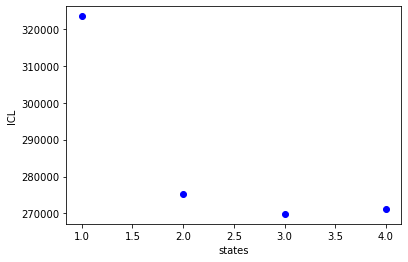

In [9]:
# give ICL_plot a H2MM_list object
bhm.ICL_plot(bdata.models);

In [10]:
bdata.models[2].E

array([0.66031034, 0.15955158, 0.06730048])

In [11]:
bdata.models[2].S

array([0.43073408, 0.55348988, 0.9708039 ])

In [12]:
bdata.models[2].trans

array([[1.99994147e+07, 5.31727338e+02, 5.35450105e+01],
       [2.05278771e+02, 1.99996914e+07, 1.03279278e+02],
       [7.90911127e+00, 1.16271189e+02, 1.99998758e+07]])

In [13]:
mid_dwell_mask = bdata.models[2].dwell_pos == 0
mid_dwell_E = bdata.models[2].dwell_E[mid_dwell_mask]
print("Middle dwells:")
mid_dwell_E

Middle dwells:


array([0.8       , 0.21875   , 0.55555556, 0.28571429, 0.58823529,
       0.27272727, 0.11111111, 0.85714286, 0.21428571, 0.08108108,
       0.66666667, 0.08571429, 0.58333333, 0.14285714, 0.        ,
       0.        , 0.2       , 0.70588235, 0.        , 0.74193548,
       0.08      , 0.06      , 0.57142857, 0.04651163, 0.63636364,
       0.775     , 0.85714286, 0.07692308, 0.57142857, 0.17021277,
       0.54166667, 1.        , 0.64285714, 0.03846154, 0.7       ,
       0.10526316, 0.        , 0.        , 0.23076923, 0.08108108,
       0.18181818, 0.5       , 0.83333333, 0.70454545, 0.2       ,
       0.07843137, 0.13333333, 0.71428571, 0.06666667, 0.77777778,
       0.875     , 0.14285714, 0.        , 0.76470588, 0.        ,
       0.9       , 0.56      , 0.72      , 0.08108108, 0.35714286,
       0.6       , 0.65909091, 0.13333333, 0.8       , 0.        ,
       0.55555556, 0.16853933, 0.75      , 0.24637681, 0.8       ,
       0.15      , 0.05660377, 0.6875    , 0.8125    ,        

In [14]:
bdata.irf_thresh = np.array([2355, 2305, 220])

In [15]:
mid_dwell_mask = bdata.models[2].dwell_pos == 0
mid_dwell_nano_mean = bdata.models[2].dwell_nano_mean[:, mid_dwell_mask]

mid_dwell_nano_mean

array([[ 5.28919324,  3.02778298,  3.07976408,  4.42869837,  1.83839165,
         2.11497928,  2.99796568,         nan,  2.2720322 ,  3.53096402,
         3.91131565,  5.02676288,  0.80131888,  4.31401096,  2.71656024,
         4.09526792,  3.82860111,  2.19385475,  2.07353476,  2.01958418,
         4.18760187,  3.45690921,  3.24925035,  3.75190694,  3.62486858,
         3.02259003,  4.32826206,  2.81541278,  2.1645382 ,  3.94518814,
         3.23703513,         nan,  1.00572035,  3.84502028,  7.40649924,
         4.2236496 ,  3.95926042,  4.24145992,  3.148314  ,  3.20631198,
         3.42922136,  1.453612  ,  1.36810541,  1.66432466,  3.38972546,
         3.73029762,  3.80175446,  2.98606774,  4.77411784,  1.61851756,
                nan,  2.4286092 ,  4.32317238,  4.07988578,  4.724239  ,
         0.36645681,  0.95957393,  3.37954611,  3.56204741,  4.53795679,
         1.80785358,  2.04944362,  2.21095607,  0.5008243 ,  3.34856546,
         4.11653146,  3.58945354,  2.53313268,  3.0

In [16]:
mid_dwell_mask = bdata.models[2].dwell_pos == 0
mid_dwell_nano_mean_DD = bdata.models[2].dwell_nano_mean[0, mid_dwell_mask]
mid_dwell_nano_mean_DD

array([ 5.28919324,  3.02778298,  3.07976408,  4.42869837,  1.83839165,
        2.11497928,  2.99796568,         nan,  2.2720322 ,  3.53096402,
        3.91131565,  5.02676288,  0.80131888,  4.31401096,  2.71656024,
        4.09526792,  3.82860111,  2.19385475,  2.07353476,  2.01958418,
        4.18760187,  3.45690921,  3.24925035,  3.75190694,  3.62486858,
        3.02259003,  4.32826206,  2.81541278,  2.1645382 ,  3.94518814,
        3.23703513,         nan,  1.00572035,  3.84502028,  7.40649924,
        4.2236496 ,  3.95926042,  4.24145992,  3.148314  ,  3.20631198,
        3.42922136,  1.453612  ,  1.36810541,  1.66432466,  3.38972546,
        3.73029762,  3.80175446,  2.98606774,  4.77411784,  1.61851756,
               nan,  2.4286092 ,  4.32317238,  4.07988578,  4.724239  ,
        0.36645681,  0.95957393,  3.37954611,  3.56204741,  4.53795679,
        1.80785358,  2.04944362,  2.21095607,  0.5008243 ,  3.34856546,
        4.11653146,  3.58945354,  2.53313268,  3.03955562,  2.31

In [17]:
mid_dwell_mask = bdata.models[2].dwell_pos == 0
state1_mask = bdata.models[2].dwell_state == 1
comb_mask = mid_dwell_mask * state1_mask
state1_mid_nano_mean_DD = bdata.models[2].dwell_nano_mean[0, comb_mask]
state1_mid_nano_mean_DD

array([3.02778298, 4.42869837, 2.11497928, 2.99796568, 2.2720322 ,
       5.02676288, 4.31401096, 3.82860111, 2.07353476, 2.81541278,
       3.94518814, 4.2236496 , 3.95926042, 3.148314  , 3.42922136,
       3.38972546, 3.80175446, 4.77411784, 2.4286092 , 4.724239  ,
       4.53795679, 2.21095607, 3.34856546, 3.58945354, 3.03955562,
       3.02449018,        nan, 8.87436233, 3.71885796, 3.84734405,
       2.78851705, 2.98307204, 3.07300208, 3.01148969, 2.592447  ,
       4.07988578, 1.41696632, 3.71702169, 2.78470157, 1.91168301,
       4.65004946, 3.52616955, 2.72677178, 2.8442686 , 3.78512705,
       4.78022546, 2.91909022, 3.37780107, 3.53630818, 2.31710218,
       4.08865569, 4.30082206, 3.45012297, 3.27368081, 4.35156928,
       1.91473681, 2.93491185, 3.77882742, 2.48672407, 4.7700461 ,
       4.03102487, 5.23563417, 4.52207699, 3.84016195, 2.68522553,
       2.19686157, 3.66224136, 4.1994205 , 4.29823296, 2.87835165,
       3.71081143, 6.46098251,        nan, 1.76347159, 3.36609

In [18]:
# make mask of dwells in state 1
state1_mask = bdata.models[2].dwell_state == 1
# get E values
state1_E = bdata.models[2].dwell_E[state1_mask]
# calculate standard deviation
np.nanstd(state1_E)

0.12135964925716479

In [19]:
mid_dwell_mask = bhm.mid_dwell(bdata.models[2])
mid_dwell_mask

array([False, False,  True, ..., False, False, False])

In [20]:
bdata.models[2].burst_state_counts

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1]])

In [21]:
bdata.models[2].burst_type

array([4, 3, 4, ..., 4, 4, 6])